## Team members 
1. Sai Hruthik Gangapuram 
2. Sujith Kumar Gajarla

# Task 1: Importing packages

In [1]:
import sys
import cv2
import torch
import torchvision
import numpy as np 
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt 
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
from sklearn.model_selection import train_test_split

# Task 2: Setup Configurations

In [2]:
sys.path.append('\Deep learning project final')
DEVICE = 'cuda'
IMAGE_HEIGHT = 500
IMAGE_WIDTH = 666
BATCH_SIZE = 8

In [3]:
data_frame = pd.read_csv('train.csv')
data_frame.head()

,masks,images
0,white masked images\0.png,training samples\0.jpg
1,white masked images\1.png,training samples\1.jpg
2,white masked images\10.png,training samples\10.jpg
3,white masked images\100.png,training samples\100.jpg
4,white masked images\101.png,training samples\101.jpg


In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   masks   145 non-null    object
 1   images  145 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [5]:
row = data_frame.iloc[55]

image_path = row.images
mask_path = row.masks

image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

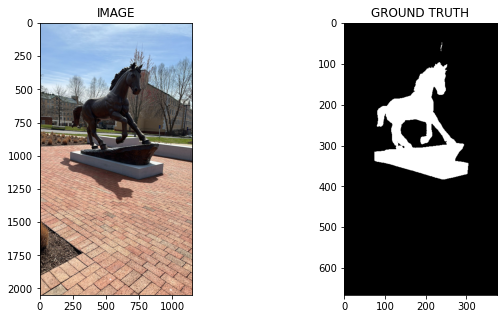

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
        
ax1.set_title('IMAGE')
ax1.imshow(image)

ax2.set_title('GROUND TRUTH')
ax2.imshow(mask,cmap = 'gray')

# Task 3: Defining visulization functions

In [7]:
def show_image(image, mask, pred_image = None):
    
    if pred_image == None:
        
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
        
        ax1.set_title('IMAGE')
        ax1.imshow(image.permute(1,2,0).squeeze(),cmap = 'gray')
        
        ax2.set_title('GROUND TRUTH')
        ax2.imshow(mask.permute(1,2,0).squeeze(),cmap = 'gray')
        
    elif pred_image != None :
        
        f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(10,5))
        
        ax1.set_title('IMAGE')
        ax1.imshow(image.permute(1,2,0).squeeze(),cmap = 'gray')
        
        ax2.set_title('GROUND TRUTH')
        ax2.imshow(mask.permute(1,2,0).squeeze(),cmap = 'gray')
        
        ax3.set_title('MODEL OUTPUT')
        ax3.imshow(pred_image.permute(1,2,0).squeeze(),cmap = 'gray')

# Task 4: Spliting the dataset into training | testing| validation

In [8]:
training_data, testing_data = train_test_split(data_frame, test_size=0.2, random_state=42)

validation_data, test_data = train_test_split(testing_data, test_size=0.5, random_state=42)

# Task 5 : Create Custom Dataset 

In [9]:
class SegmentationDataset(Dataset):
    
    def __init__(self, df):
        
        self.df=df
        self.transforms = transforms.Resize((IMAGE_WIDTH, IMAGE_HEIGHT))
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self ,idx):
        row = self.df.iloc[idx]
        image_path = row['images']
        mask_path = row['masks']
        
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = np.expand_dims(mask, axis=-1)
        
        image = np.transpose(image ,(2,0,1)).astype(np.float32)
        mask = np.transpose(mask ,(2,0,1)).astype(np.float32)
        
        original_image = self.transforms(torch.Tensor(image))
        original_image = original_image/255
        masked_image = self.transforms(torch.Tensor(mask))
        
        masked_image = masked_image/255
        
        return original_image, masked_image

In [10]:
train_data_set = SegmentationDataset(training_data)
valid_data_set = SegmentationDataset(validation_data)
test_data_set = SegmentationDataset(test_data)

In [11]:
print('Size of Training dataset: {}'.format(train_data_set.__len__()))
print('Size of Testing dataset: {}'.format(test_data_set.__len__()))
print('Size of Validation dataset: {}'.format(valid_data_set.__len__()))

Size of Training dataset: 116
Size of Testing dataset: 15
Size of Validation dataset: 14


# Task 6: Loading dataset into Batches

In [12]:
train_loader = DataLoader(train_data_set, batch_size=8, shuffle=True)

val_loader = DataLoader(valid_data_set, batch_size=8, shuffle=True)

test_loader = DataLoader(test_data_set, batch_size=8, shuffle=True)

In [13]:
print('Total number of batches in train data loader: {}'.format(len(train_loader)))
print('Total number of batches in test data loader: {}'.format(len(test_loader)))
print('Total number of batches in validation data loader: {}'.format(len(val_loader)))

Total number of batches in train data loader: 15
Total number of batches in test data loader: 2
Total number of batches in validation data loader: 2


# Task 7: Visualising 1st sample in each batch

In [14]:
for image , mask in train_loader:
    break
print (f'One batch image shape: {image.shape}')
print (f'One batch image shape: {mask.shape}')

One batch image shape: torch.Size([8, 3, 666, 500])
One batch image shape: torch.Size([8, 1, 666, 500])


### Train data loader

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

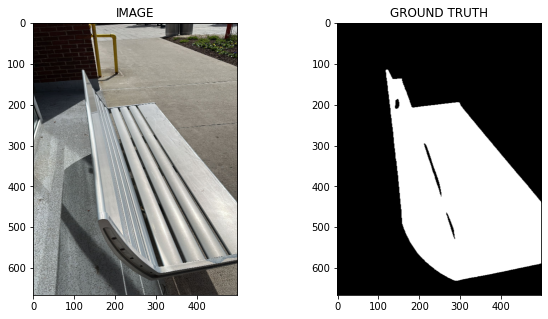

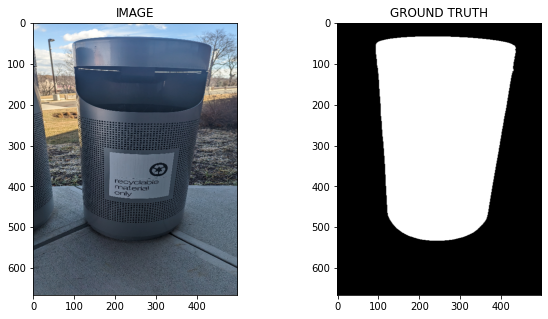

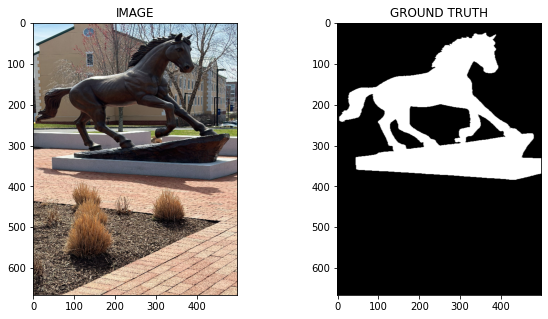

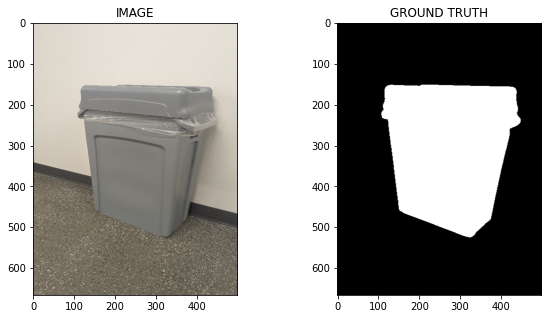

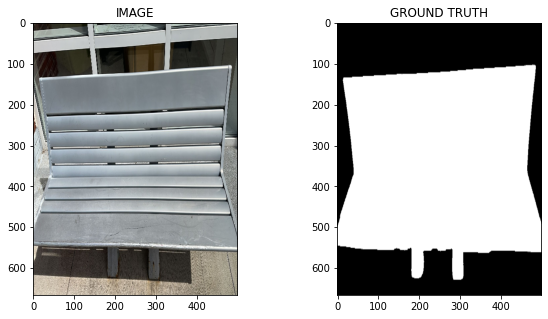

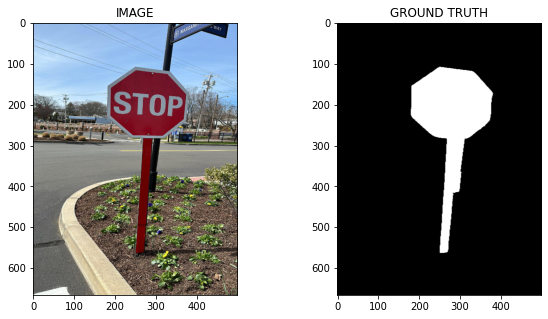

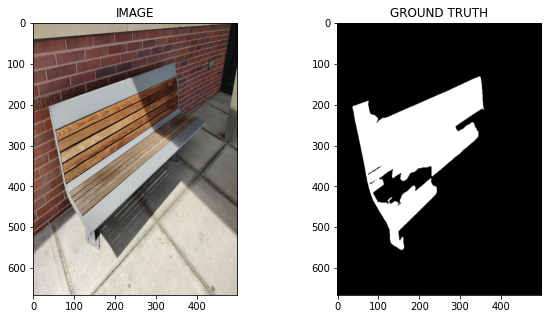

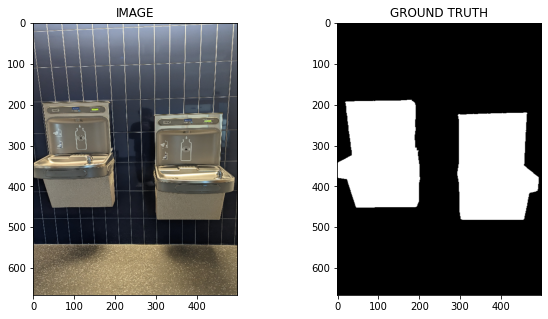

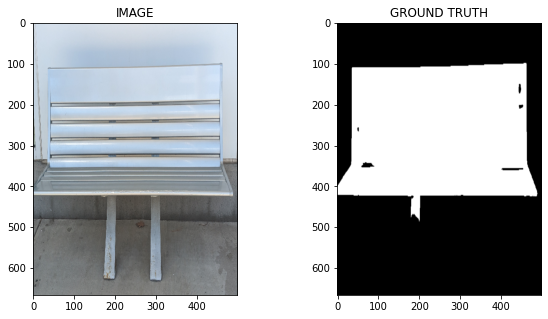

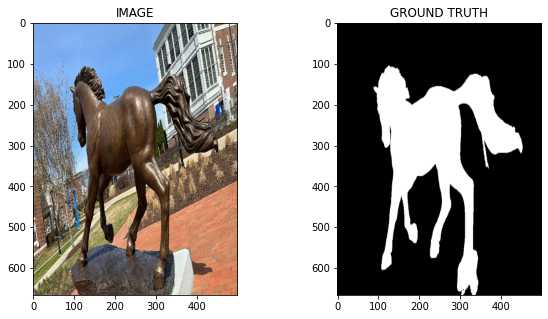

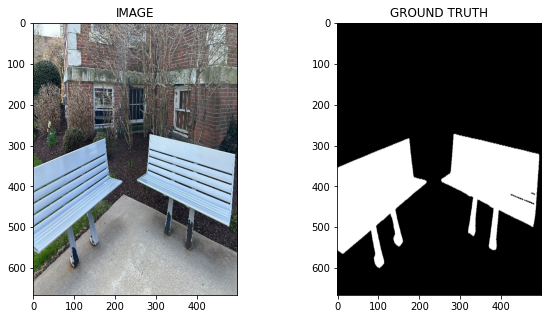

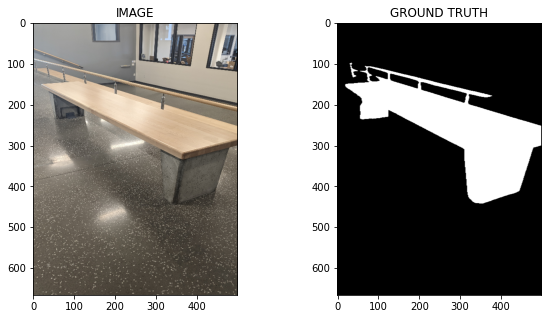

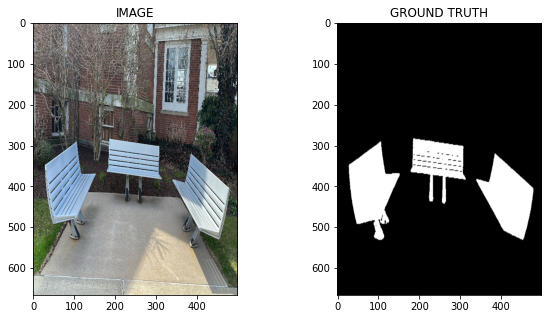

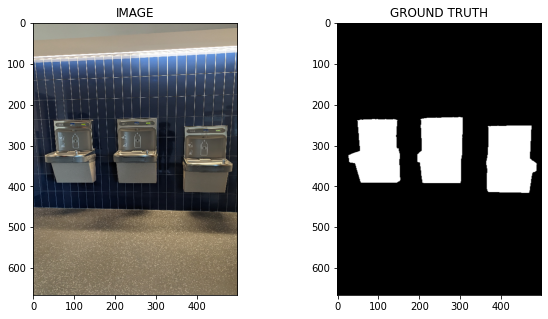

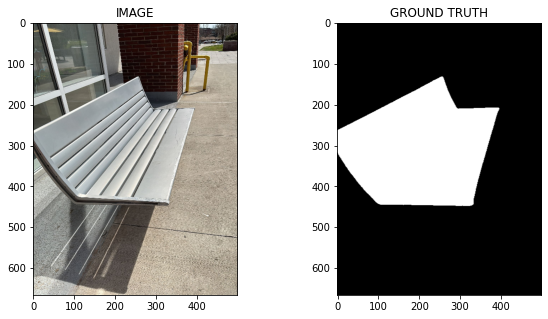

In [19]:
for batch_idx, (Original_images, Masked_images) in enumerate(train_loader):
    original_image = Original_images[0]
    masked_image = Masked_images[0]
    show_image(original_image, masked_image)

### Test data loader

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


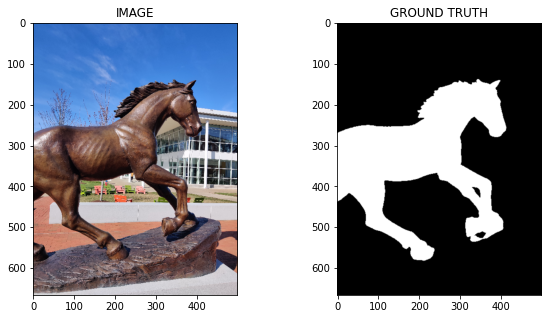

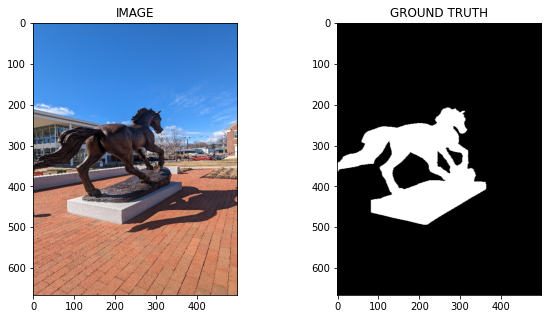

In [16]:
for batch_idx, (Original_images, Masked_images) in enumerate(test_loader):
    original_image = Original_images[0]
    masked_image = Masked_images[0]
    show_image(original_image, masked_image)

### Validation data loader

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


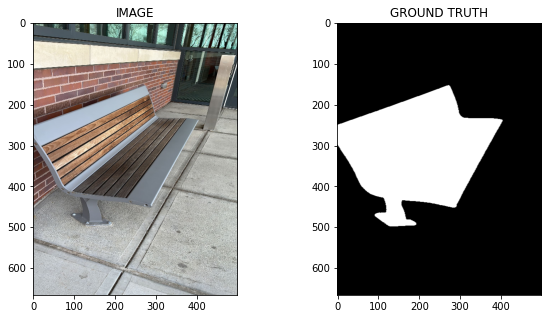

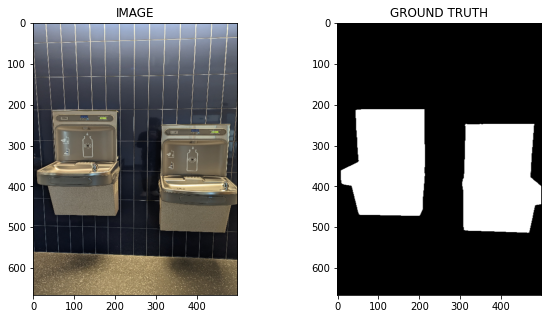

In [17]:
for batch_idx, (Original_images, Masked_images) in enumerate(val_loader):
    original_image = Original_images[0]
    masked_image = Masked_images[0]
    show_image(original_image, masked_image)